<a href="https://colab.research.google.com/github/dharaadhvaryu/Django-api-example/blob/master/casestudy_netflix_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Introduction
Netflix, Inc. is an American subscription streaming service and production company. It offers a library of films and television series through distribution deals as well as its own productions, known as Netflix Originals. As of March 31, 2023, with an estimated 232.5 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service. Founded by Reed Hastings and Marc Randolph in Scotts Valley, California, Netflix initially operated as a DVD sales and rental business. However, within a year, it shifted its focus exclusively to DVD rentals. In 2007, the company introduced streaming media and video on demand services, marking a significant step in its evolution.


1.1.1	Problem Statement
Analyzing the data and generating Insights that would help Netflix in deciding which type of
Shows/Movies to produce more and how to grow business in different countries


The Dataset consists of data of range 2008-mid 2021 ,about 8807 tv shows and movies available , along with other details such as – cast, director, type ,ratings, release year ,duration etc. .The data is available in single csv file

#Features of Dataset
->Show_id: Unique ID for every Movie / Tv Show
->Type: Identifier - A Movie or TV Show
->Title: Title of the Movie / Tv Show
->Director: Director of the Movie
->Cast: Actors involved in the movie/show
->Country: Country where the movie/show was `produced`
->Date_added: Date it was added on Netflix
->Release_year: Actual Release year of the movie/show
->Rating: TV Rating of the movie/show
->Duration: Total Duration - in minutes or number of seasons
->Listed_in: Genre
->Description: The summary description












In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read File and show


In [90]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Shape of dataframe

In [91]:
df.shape

(8807, 12)

#checking info

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#Checking datatypes

In [93]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

checking NAN values

In [94]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [95]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


# Filling NAN Space

In [96]:
df['director'] = df['director'].fillna('NotAvailable')
df['cast'] = df['cast'].fillna('NotAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [97]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [98]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [99]:
df['rating'].fillna(df['rating'].mode()[0])

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

Splitting rows with multiple values

In [100]:
## Converting the columns to string tyoe before splitting
df['director'] = df['director'].astype(str)
df['cast'] = df['cast'].astype(str)
df['country'] = df['country'].astype(str)
df['listed_in'] = df['listed_in'].astype(str)

In [101]:
df['cast'] = df['cast'].apply(lambda x: x.split(','))
df['director'] = df['director'].apply(lambda x: x.split(','))
df['country'] = df['country'].apply(lambda x: x.split(','))
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(','))

In [102]:
df = df.explode('cast')
df = df.explode('director')
df = df.explode('country')
df = df.explode('listed_in')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NotAvailable,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


Converting data_added column to datetime

In [103]:
df['date_added'] = pd.to_datetime(df['date_added'],format = 'mixed')
df['year'] = df['date_added'].dt.year
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021
1,s2,TV Show,Blood & Water,NotAvailable,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021


splitting duration of movies and seasons

In [104]:
df['duration'] = df['duration'].astype(str)
df['movie_min'] = df[df['type']=='movie']['duration'].apply(lambda x: x.split(' ')[0])
df['seasons_no'] = df[df['type']=='Tv Show']['duration'].apply(lambda x: x.split(' ')[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,movie_min,seasons_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN


In [105]:
df.isnull().sum()

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
date_added           0
release_year         0
rating              67
duration             0
listed_in            0
description          0
year                 0
movie_min       202065
seasons_no      202065
dtype: int64

In [106]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

replacing rating values

In [107]:
df['rating'] = df['rating'].replace(['66 min', '74 min', '84 min'],np.nan)

In [108]:
def get_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan
df['rating'] = df.groupby('type')['rating'].transform(lambda x: x.fillna(get_mode(x)))

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,movie_min,seasons_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN
1,s2,TV Show,Blood & Water,NotAvailable,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,NaN,NaN


In [109]:
df['movie_min'] = df['movie_min'].fillna(0)
df['seasons_no'] = df['seasons_no'].fillna(0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,movie_min,seasons_no
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NotAvailable,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,0,0
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,0,0
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,0,0
1,s2,TV Show,Blood & Water,NotAvailable,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,0,0
1,s2,TV Show,Blood & Water,NotAvailable,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,0,0


In [110]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year            0
movie_min       0
seasons_no      0
dtype: int64

Preprocessing ends here

Data analysis

Attributes


In [111]:
for i in df.columns:
  print(i,df[i].nunique())
  print('-'*20)

show_id 8807
--------------------
type 2
--------------------
title 8807
--------------------
director 5121
--------------------
cast 39297
--------------------
country 197
--------------------
date_added 1714
--------------------
release_year 74
--------------------
rating 14
--------------------
duration 220
--------------------
listed_in 73
--------------------
description 8775
--------------------
year 14
--------------------
movie_min 1
--------------------
seasons_no 1
--------------------


# **Titles**

In [112]:
total_no_titles = df['title'].nunique()
total_no_movies = df[df['type']=='Movie']['title'].nunique()
total_no_tv_shows = df[df['type']=='TV Show']['title'].nunique()
print(f"total no of title is {total_no_titles}")
print(f"Title of movie is {total_no_movies}")
print(f"Title of Tv show is {total_no_tv_shows}")

total no of title is 8807
Title of movie is 6131
Title of Tv show is 2676


Content Types

In [113]:
no_of_shows = pd.DataFrame(df.groupby('type')['show_id'].nunique()).reset_index()
no_of_shows.columns = ['type','no_of_titles']
no_of_shows.head()

,type,no_of_titles
0,Movie,6131
1,TV Show,2676


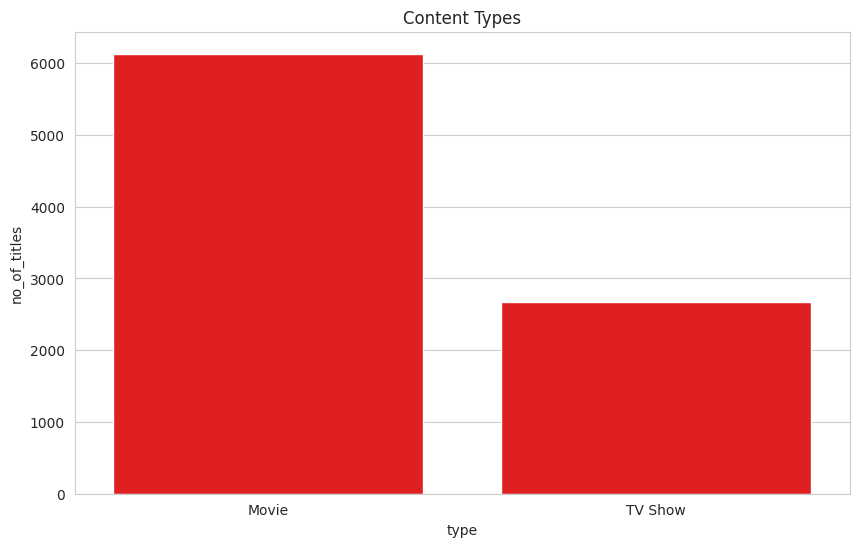

In [114]:
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.barplot(x = 'type',y = 'no_of_titles',data = no_of_shows,color='r')
plt.title('Content Types')
plt.show()

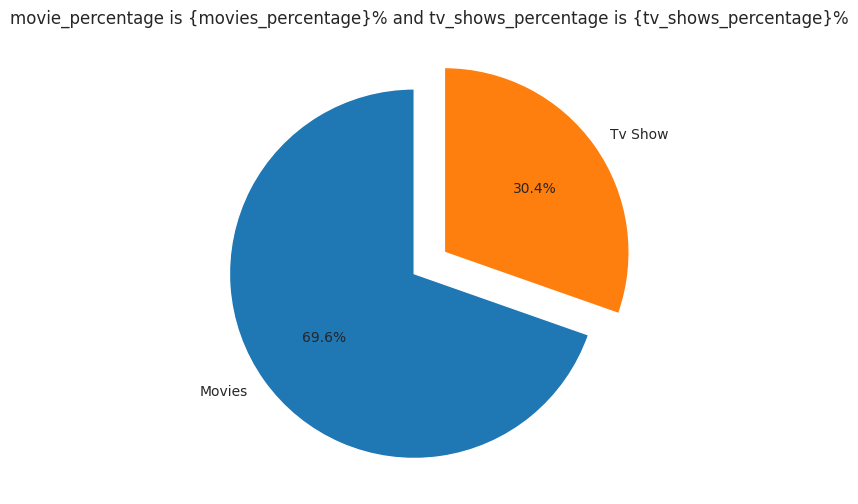

In [115]:
movies_percentage = round(df[df['type']=='Movie']['show_id'].nunique()/total_no_titles*100,2)
tv_shows_percentage = round(df[df['type']=='TV Show']['show_id'].nunique()/total_no_titles*100,2)
plt.figure(figsize = (10,6))
types = np.array([movies_percentage,tv_shows_percentage])
label = ['Movies','Tv Show']
plt.pie(types,labels = label,autopct='%1.1f%%',startangle=90,explode=(0.1,0.1))
plt.title('movie_percentage is {movies_percentage}% and tv_shows_percentage is {tv_shows_percentage}%')
plt.show()

least common genere **bold text**

In [116]:
df_list_of_genres = pd.DataFrame(df.groupby('listed_in')['show_id'].nunique()).reset_index()
# df_listed_in
df_list_of_genres.columns = ['Genre','titles_number']

df_listed_in = df_list_of_genres.sort_values('titles_number',ascending = False).head(5)

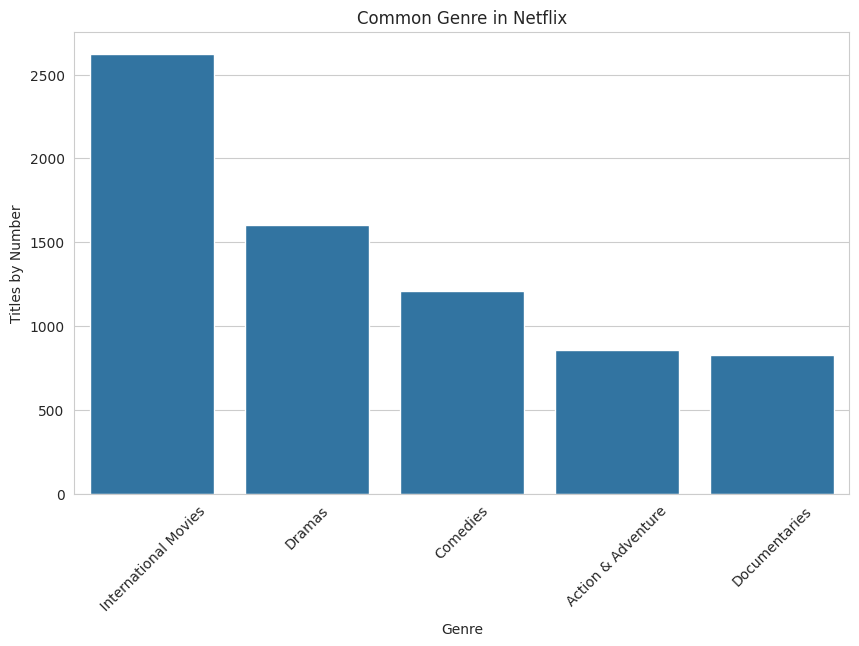

In [117]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_listed_in, x = 'Genre',y = 'titles_number')
plt.xlabel('Genre')
plt.ylabel('Titles by Number')
plt.xticks(rotation = 45)
plt.title('Common Genre in Netflix')
plt.show()

Least common Genre in Netflix

In [118]:
df_least_genre = pd.DataFrame(df.groupby('listed_in')['show_id'].nunique()).reset_index()
df_least_genre.columns = ['Genre','titles_number']
df_listed_in = df_least_genre.sort_values('titles_number',ascending = False).tail(5)
df_listed_in


,Genre,titles_number
59,Romantic Movies,3
62,Spanish-Language TV Shows,2
70,TV Sci-Fi & Fantasy,1
55,LGBTQ Movies,1
63,Sports Movies,1


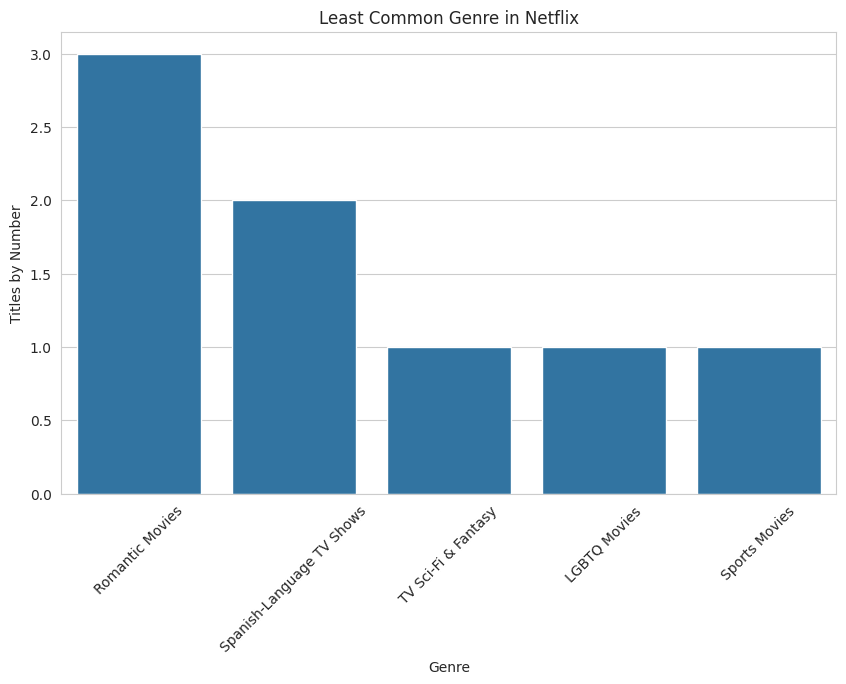

In [119]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_listed_in, x = 'Genre',y = 'titles_number')
plt.xlabel('Genre')
plt.ylabel('Titles by Number')
plt.xticks(rotation = 45)
plt.title('Least Common Genre in Netflix')
plt.show()

No of shows based on type/category and rating

In [120]:
df_title_rating = pd.DataFrame(df.groupby(['type','rating'])['show_id'].nunique()).reset_index()
df_title_rating.columns = ['type','rating','titles_number']
df_title_rating

,type,rating,titles_number
0,Movie,G,41
1,Movie,NC-17,3
2,Movie,NR,75
3,Movie,PG,287
4,Movie,PG-13,490
5,Movie,R,797
6,Movie,TV-14,1427
7,Movie,TV-G,126
8,Movie,TV-MA,2067
9,Movie,TV-PG,540


Which country has highest production of Movies and Tv shows

In [121]:
df_country = pd.DataFrame(df.groupby('country')['show_id'].nunique()).reset_index()
df_country.columns = ['country','No of Production']
df_country = df_country.sort_values('No of Production',ascending = False).head(10)

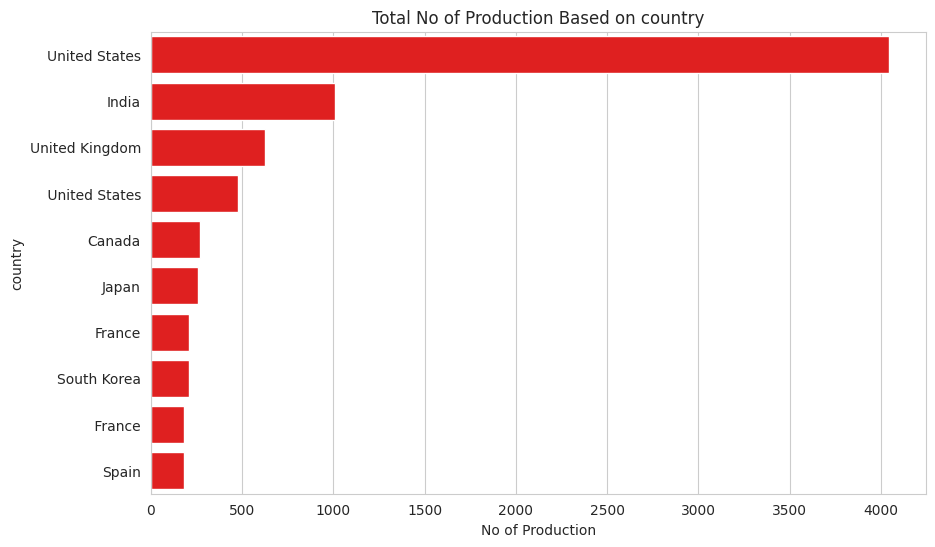

In [122]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_country, x = 'No of Production', y = 'country',color = 'r')
plt.title('Total No of Production Based on country')
plt.show()

In [123]:
df['country'].isna().sum()

0

In [124]:
#df_country = pd.DataFrame(df.groupby(['type','country'])['show_id'].nunique()).reset_index()

#df_grouped = df.groupby(['type', 'country'], as_index=False)['show_id'].sum()
df_country = pd.DataFrame(df.groupby(['type','country'])['show_id'].nunique()).reset_index()
df_country.columns = ['type','country','titles_number']
#df_country.head()

#df_country
df_country = df_country.sort_values('titles_number',ascending = False).head(10)
df_country

,type,country,titles_number
181,Movie,United States,2804
287,TV Show,United States,1238
136,Movie,India,927
103,Movie,United States,388
180,Movie,United Kingdom,382
286,TV Show,United Kingdom,246
118,Movie,Canada,187
256,TV Show,Japan,174
277,TV Show,South Korea,164
32,Movie,France,155


In [125]:
#df_country.drop_duplicates(df.groupby['type','country'])
#df_country.head()

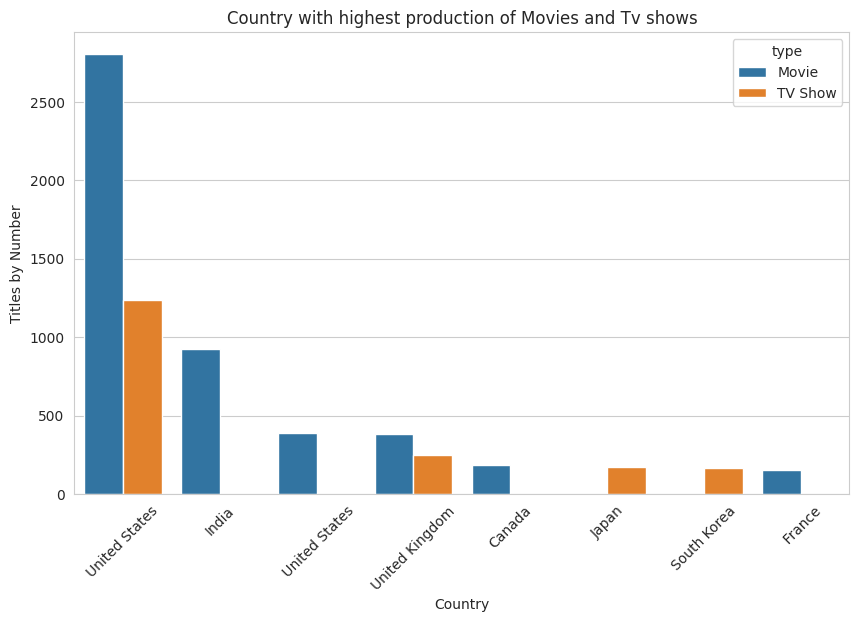

In [126]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data = df_country, x = 'country',y = 'titles_number',hue = 'type')
plt.xlabel('Country')
plt.ylabel('Titles by Number')
plt.xticks(rotation = 45)
plt.title('Country with highest production of Movies and Tv shows')
plt.show()

# Duration of content based on **Type**

In [127]:
df_by_duration = pd.DataFrame(df.groupby(['type','duration'])['show_id'].nunique()).reset_index()
df_by_duration.columns = ['type','duration','number of titles']
df_by_duration

,type,duration,number of titles
0,Movie,1 Season,3
1,Movie,10 min,1
2,Movie,100 min,108
3,Movie,101 min,116
4,Movie,102 min,122
...,...,...,...
216,TV Show,5 Seasons,65
217,TV Show,6 Seasons,33
218,TV Show,7 Seasons,23
219,TV Show,8 Seasons,17


# Duration of top 10 Movies

In [128]:
movies_data = df_by_duration[df_by_duration['type'] == 'Movie']
movies_data_sorted = movies_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_movies_desc = movies_data_sorted.sort_values(by='number of titles', ascending=True)

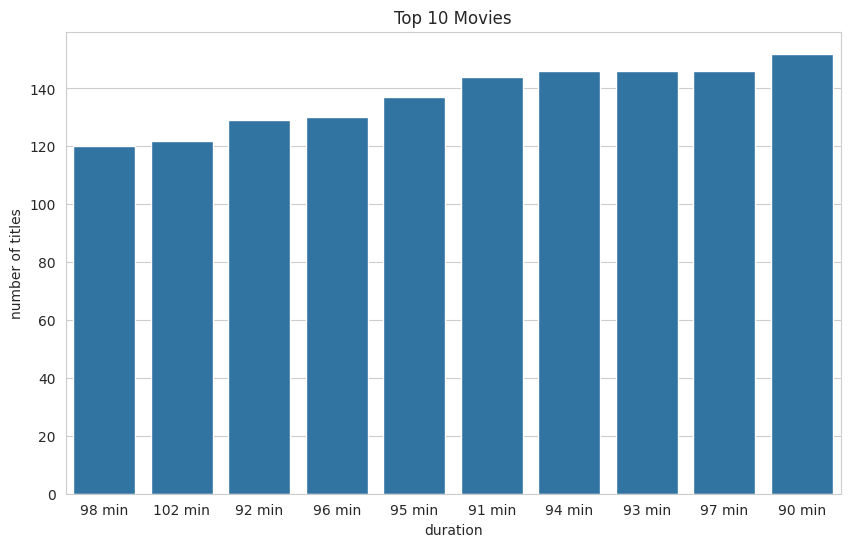

In [129]:
plt.figure(figsize = (10,6))
sns.barplot(x = 'duration',y = 'number of titles',data = top_10_movies_desc)
plt.title('Top 10 Movies')
plt.show()

# Duration of Top 10 Tv Shows

In [130]:
tv_Show_data = df_by_duration[df_by_duration['type'] == 'TV Show']
tv_Show_data_sorted = tv_Show_data.sort_values(by='number of titles', ascending= False).head(10)
top_10_tv_show_desc = tv_Show_data_sorted.sort_values(by='number of titles', ascending=True)

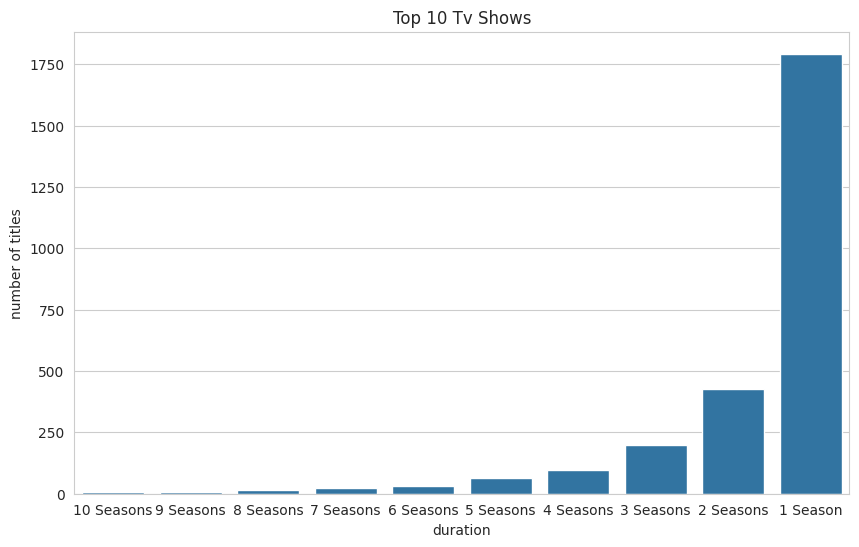

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x='duration', y='number of titles', data=top_10_tv_show_desc)
plt.title('Top 10 Tv Shows')
plt.show()

In [132]:
df_directors = pd.DataFrame(df.groupby('director')['title'].nunique()).reset_index()
df_directors = df_directors.sort_values('title',ascending = False).iloc[1:]
df_directors.head()

,director,title
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3235,Marcus Raboy,16


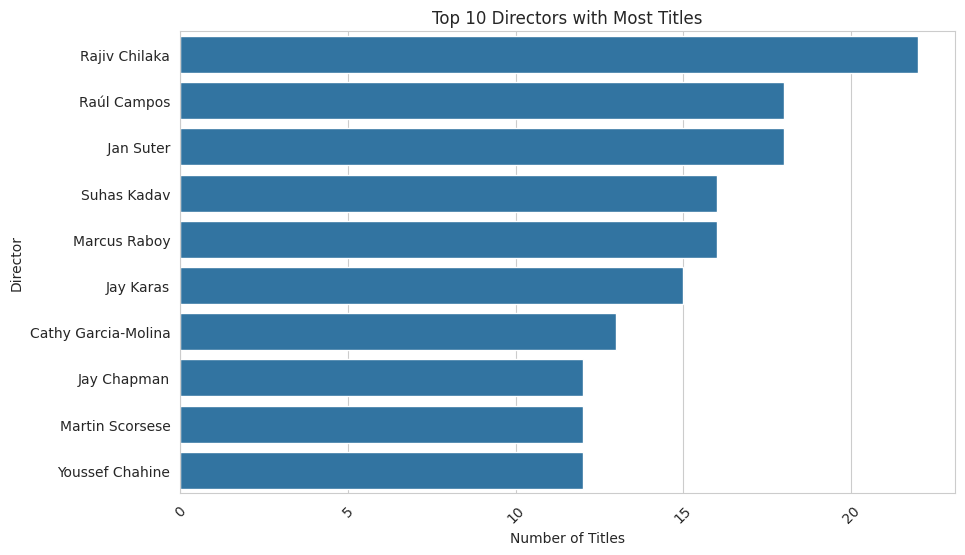

In [133]:
# graph of top directors grouped with title

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_directors = pd.DataFrame(df.groupby('director')['title'].nunique()).reset_index()
df_directors = df_directors.sort_values('title',ascending = False).iloc[1:]

top_10_directors = df_directors.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='title', y='director', data=top_10_directors)

# Add title and labels
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Top Directors by number of movies and tvshows produced

In [134]:
df_director = pd.DataFrame(df.groupby('director')['show_id'].nunique()).reset_index()
df_director = df_director.sort_values('show_id',ascending = False).iloc[1:]
df_director.head()

,director,show_id
4021,Rajiv Chilaka,22
4068,Raúl Campos,18
261,Jan Suter,18
4652,Suhas Kadav,16
3235,Marcus Raboy,16


In [135]:
df_director = pd.DataFrame(df.groupby(['director','listed_in'])['show_id'].nunique()).reset_index()
df_director.columns = ['director','type','titles_number']
df_director = df_director.sort_values('titles_number',ascending = False).iloc[1:]
df_director.head()

,director,type,titles_number
8824,NotAvailable,TV Dramas,637
8809,NotAvailable,International TV Shows,511
8823,NotAvailable,TV Comedies,422
8845,NotAvailable,Kids' TV,373
8838,NotAvailable,Crime TV Shows,340


In [136]:
df_director = pd.DataFrame(df.groupby(['director','listed_in'])['show_id'].nunique()).reset_index()
df_director.columns = ['Director','listed_in','No_of_titles']

directors_sort = df_director.sort_values(['No_of_titles','Director'], ascending = False).groupby('Director').head(10)
directors_sort = directors_sort.sort_values('No_of_titles', ascending = False).iloc[5:20]
directors_sort

,Director,listed_in,No_of_titles
8838,NotAvailable,Crime TV Shows,340
8816,NotAvailable,Romantic TV Shows,310
8834,NotAvailable,British TV Shows,228
8840,NotAvailable,Docuseries,194
8833,NotAvailable,Anime Series,165
9714,Rajiv Chilaka,Children & Family Movies,22
545,Jan Suter,Stand-Up Comedy,18
9841,Raúl Campos,Stand-Up Comedy,18
11365,Suhas Kadav,Children & Family Movies,16
7677,Marcus Raboy,Stand-Up Comedy,15


# Addition of content over years

In [137]:
df_title_over_years = pd.DataFrame(df.groupby('year')['show_id'].nunique()).reset_index()
df_title_over_years.columns = ['year','titles_number']
df_title_over_time=df_title_over_years.sort_values('year',ascending = False)
df_title_over_time

,year,titles_number
13,2021,1498
12,2020,1889
11,2019,2016
10,2018,1649
9,2017,1188
8,2016,429
7,2015,82
6,2014,24
5,2013,11
4,2012,3


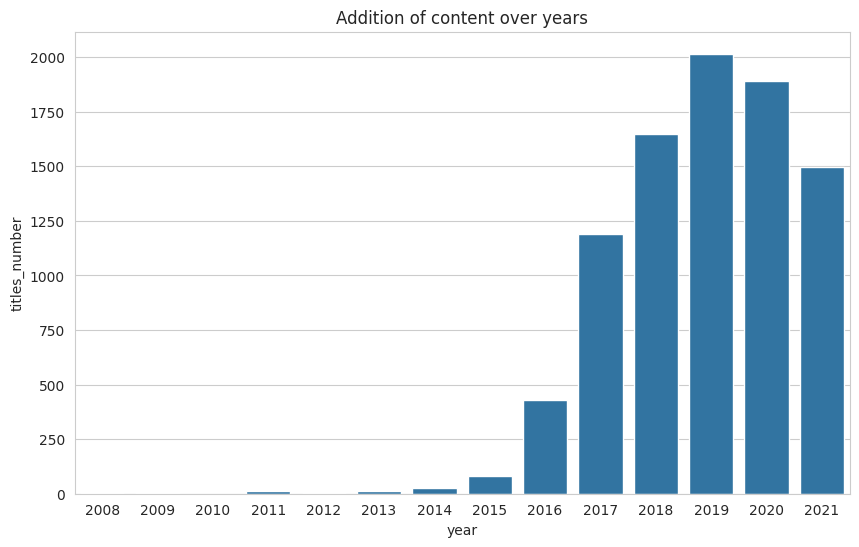

In [138]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='titles_number', data=df_title_over_time)
plt.title('Addition of content over years')
plt.show()


Movies release over span of years on netflix

In [139]:
df_movies_release_overyears = pd.DataFrame(df[df['type']=='Movie'].groupby('year')['show_id'].nunique()).reset_index()
df_movies_release_overyears.columns = ['year','titles_number']
df_movies_release_overyears

,year,titles_number
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,839


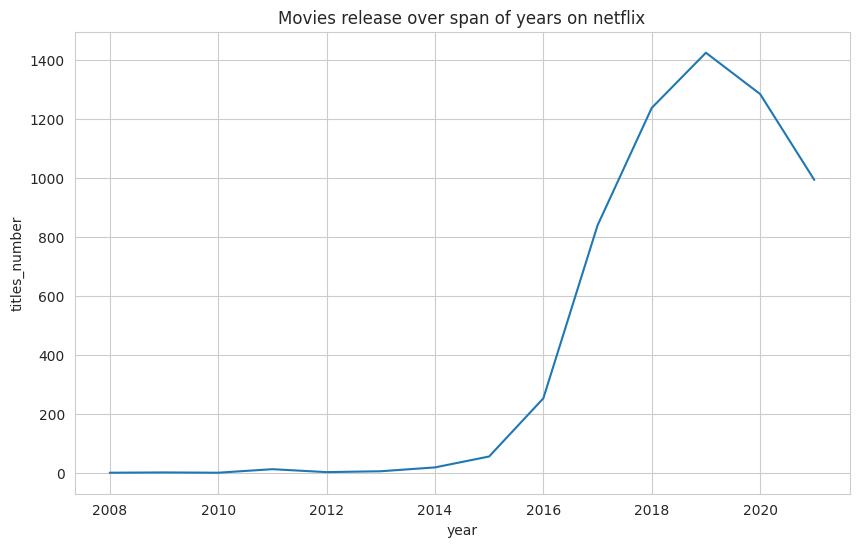

In [140]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='titles_number', data=df_movies_release_overyears)
plt.title('Movies release over span of years on netflix')
plt.show()

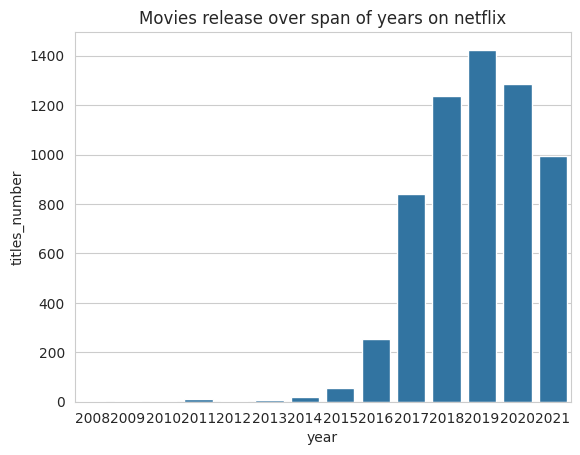

In [141]:
sns.barplot(x='year', y='titles_number', data=df_movies_release_overyears)
plt.title('Movies release over span of years on netflix')
plt.show()

In [142]:
df_tvshow_release_overyears = pd.DataFrame(df[df['type']=='TV Show'].groupby('year')['show_id'].nunique()).reset_index()
df_tvshow_release_overyears.columns = ['year','titles_number']
df_tvshow_release_overyears

,year,titles_number
0,2008,1
1,2013,5
2,2014,5
3,2015,26
4,2016,176
5,2017,349
6,2018,412
7,2019,592
8,2020,605
9,2021,505


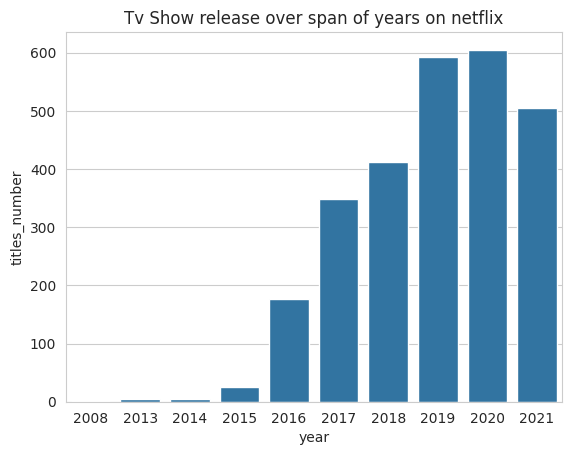

In [143]:
sns.barplot(data =df_tvshow_release_overyears,x="year",y="titles_number")
plt.title('Tv Show release over span of years on netflix')
plt.show()

In [144]:
content_by_country = df.groupby(['country', 'type']).size().reset_index(name='count')
#print(content_by_country)
df_unique = df.drop_duplicates()

# Group by 'country' and 'type' and count the number of titles
content_by_country = df_unique.groupby(['country', 'type']).size().reset_index(name='count')
full_content = content_by_country.sort_values('count', ascending=False)
full_content.head()



,country,type,count
281,United States,Movie,44514
200,India,Movie,20761
282,United States,TV Show,17250
145,United States,Movie,7501
279,United Kingdom,Movie,5655


month added and launch time

In [145]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['launch_time'] = df['date_added'].dt.time
monthly_launch_counts = df['month_added'].value_counts().sort_index()
monthly_launch_counts

month_added
1     18412
2     13060
3     15859
4     17081
5     13827
6     16659
7     20302
8     17086
9     18120
10    17796
11    15597
12    18266
Name: count, dtype: int64

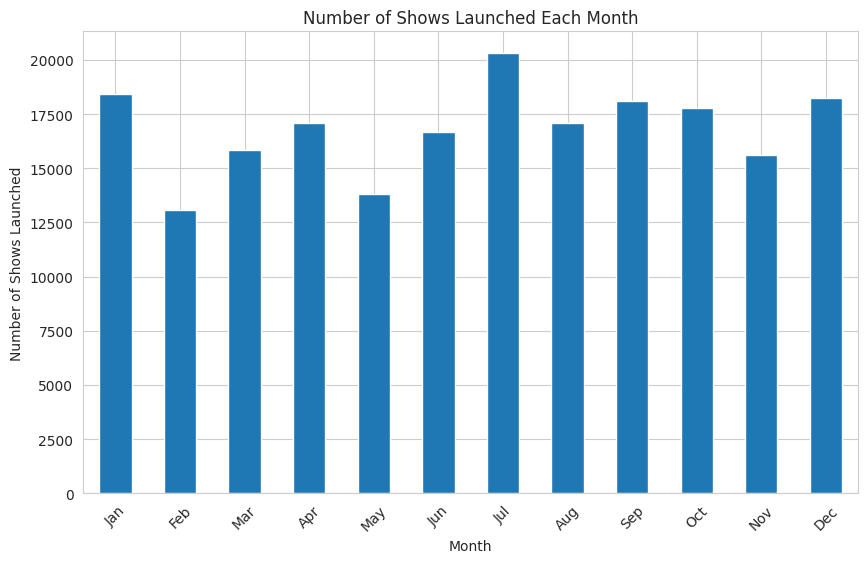

In [146]:
plt.figure(figsize=(10, 6))
monthly_launch_counts.plot(kind='bar')
plt.title('Number of Shows Launched Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows Launched')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

In [147]:
launch_counts = pd.DataFrame(df.groupby(['year','month_added'])['show_id'].nunique().sort_index()).reset_index()
launch_counts.columns = ['year','month_added','launch_show']
launch_month_count = launch_counts.sort_values('launch_show', ascending=False)
launch_month_count.head(18)

,year,month_added,launch_show
105,2021,7,257
85,2019,11,255
87,2020,1,215
86,2019,12,215
104,2021,6,207
84,2019,10,193
72,2018,10,191
102,2021,4,188
74,2018,12,185
107,2021,9,183


<Axes: xlabel='month_added', ylabel='launch_show'>

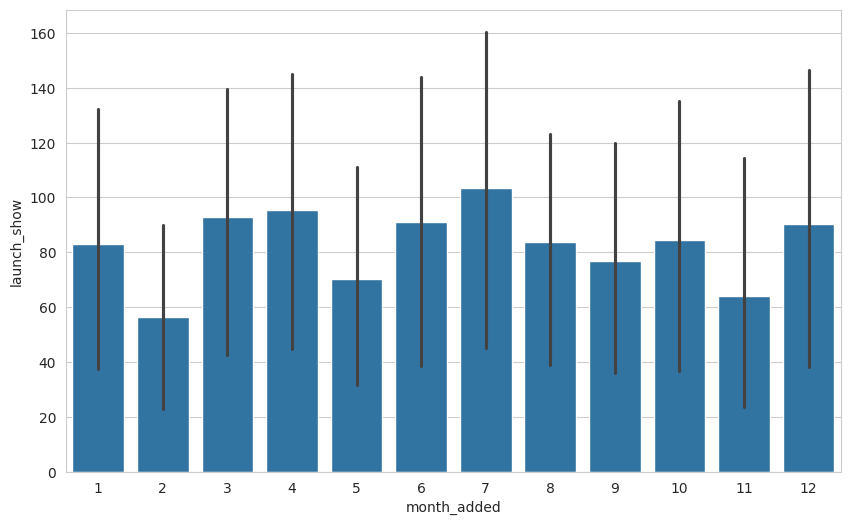

In [148]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='month_added', y='launch_show', data=launch_month_count)

Distribution of Ratings For Movies and TV Shows

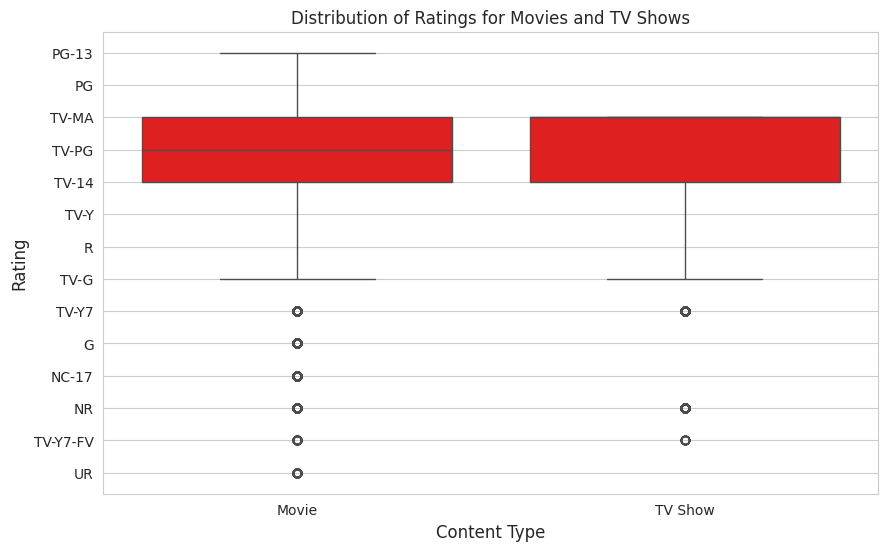

In [149]:
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='rating', data=pd.concat([df_movies, df_tv_shows]), color = 'r')
plt.title('Distribution of Ratings for Movies and TV Shows')
plt.xlabel('Content Type',fontsize = 12)
plt.ylabel('Rating',fontsize = 12)
plt.show()

Actors with most number of Movies

In [150]:
df_actor = pd.DataFrame(df.groupby(['type', 'cast'])['show_id'].nunique()).reset_index()
df_actor.columns = ['type','cast','No_of_shows']

df_actor_movie = df_actor[df_actor['type']=='Movie']
df_actor_movie_sort = df_actor_movie.sort_values('No_of_shows', ascending = False).iloc[1:11]
df_actor_movie_sort

,type,cast,No_of_shows
1946,Movie,Anupam Kher,38
16781,Movie,Om Puri,27
19235,Movie,Rupa Bhimani,27
27292,Movie,Shah Rukh Khan,26
17025,Movie,Paresh Rawal,25
3109,Movie,Boman Irani,25
11219,Movie,Julie Tejwani,24
24247,Movie,Akshay Kumar,23
18089,Movie,Rajesh Kava,21
24181,Movie,Adam Sandler,20


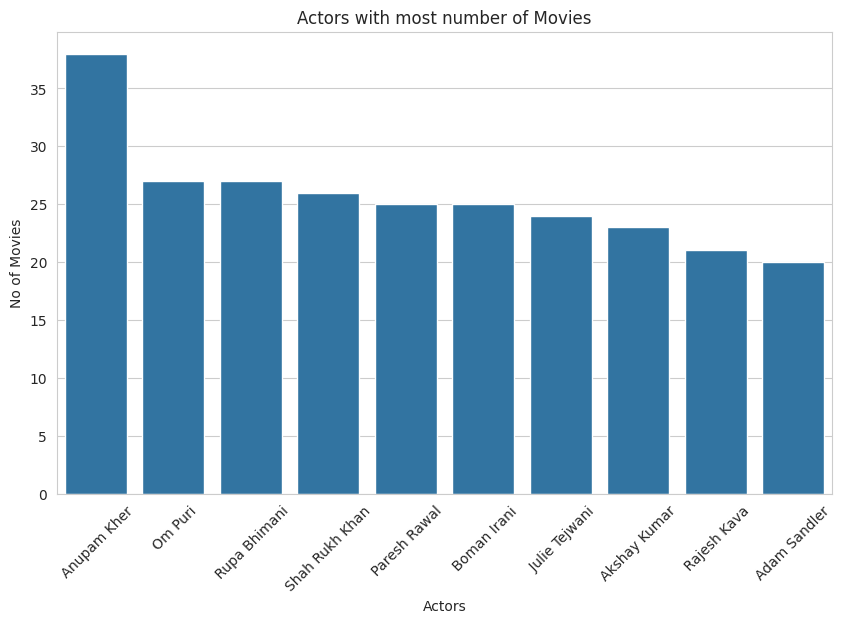

In [151]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cast', y='No_of_shows', data=df_actor_movie_sort)
plt.xlabel('Actors')
plt.ylabel('No of Movies')
plt.title('Actors with most number of Movies')
plt.xticks(rotation=45)
plt.show()

Actors with maximum TV Show Content

In [152]:
df_actor = pd.DataFrame(df.groupby(['type', 'cast'])['show_id'].nunique()).reset_index()
df_actor.columns = ['type','cast','No_of_shows']

df_actor_tv = df_actor[df_actor['type']=='TV Show']
df_actor_tv_show = df_actor_movie.sort_values('No_of_shows', ascending = False).iloc[1:11]
df_actor_tv_show

,type,cast,No_of_shows
1946,Movie,Anupam Kher,38
16781,Movie,Om Puri,27
19235,Movie,Rupa Bhimani,27
27292,Movie,Shah Rukh Khan,26
17025,Movie,Paresh Rawal,25
3109,Movie,Boman Irani,25
11219,Movie,Julie Tejwani,24
24247,Movie,Akshay Kumar,23
18089,Movie,Rajesh Kava,21
24181,Movie,Adam Sandler,20


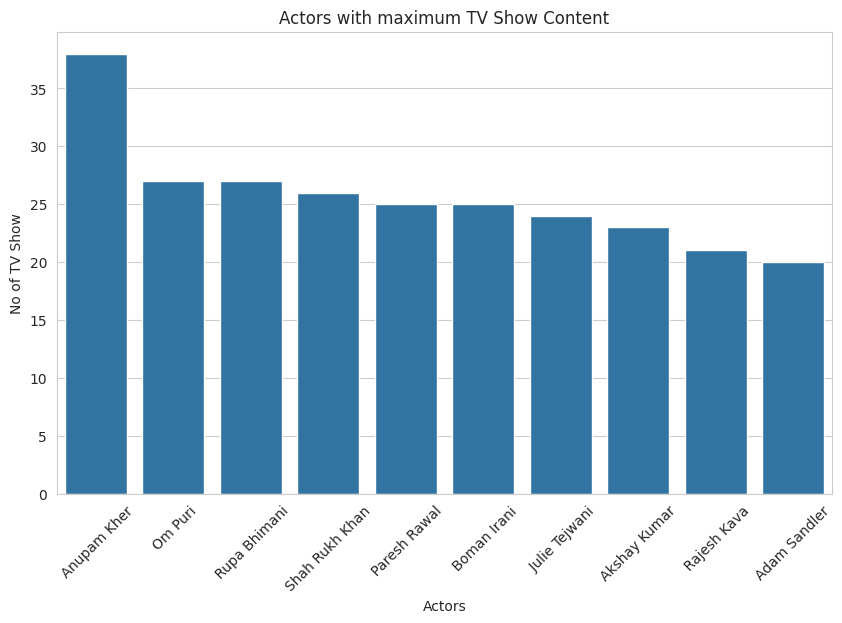

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cast', y='No_of_shows', data=df_actor_tv_show)
plt.xlabel('Actors')
plt.ylabel('No of TV Show')
plt.title('Actors with maximum TV Show Content')
plt.xticks(rotation=45)
plt.show()

In [154]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      145917
TV Show     56148
Name: count, dtype: int64

In [155]:
genre_counts = df['listed_in'].value_counts()
genre_counts

listed_in
 International Movies    27141
Dramas                   19657
Comedies                 13894
Action & Adventure       12216
 Dramas                  10149
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: count, Length: 73, dtype: int64

In [156]:
rating_counts = df['rating'].value_counts()
rating_counts

rating
TV-MA       73985
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: count, dtype: int64

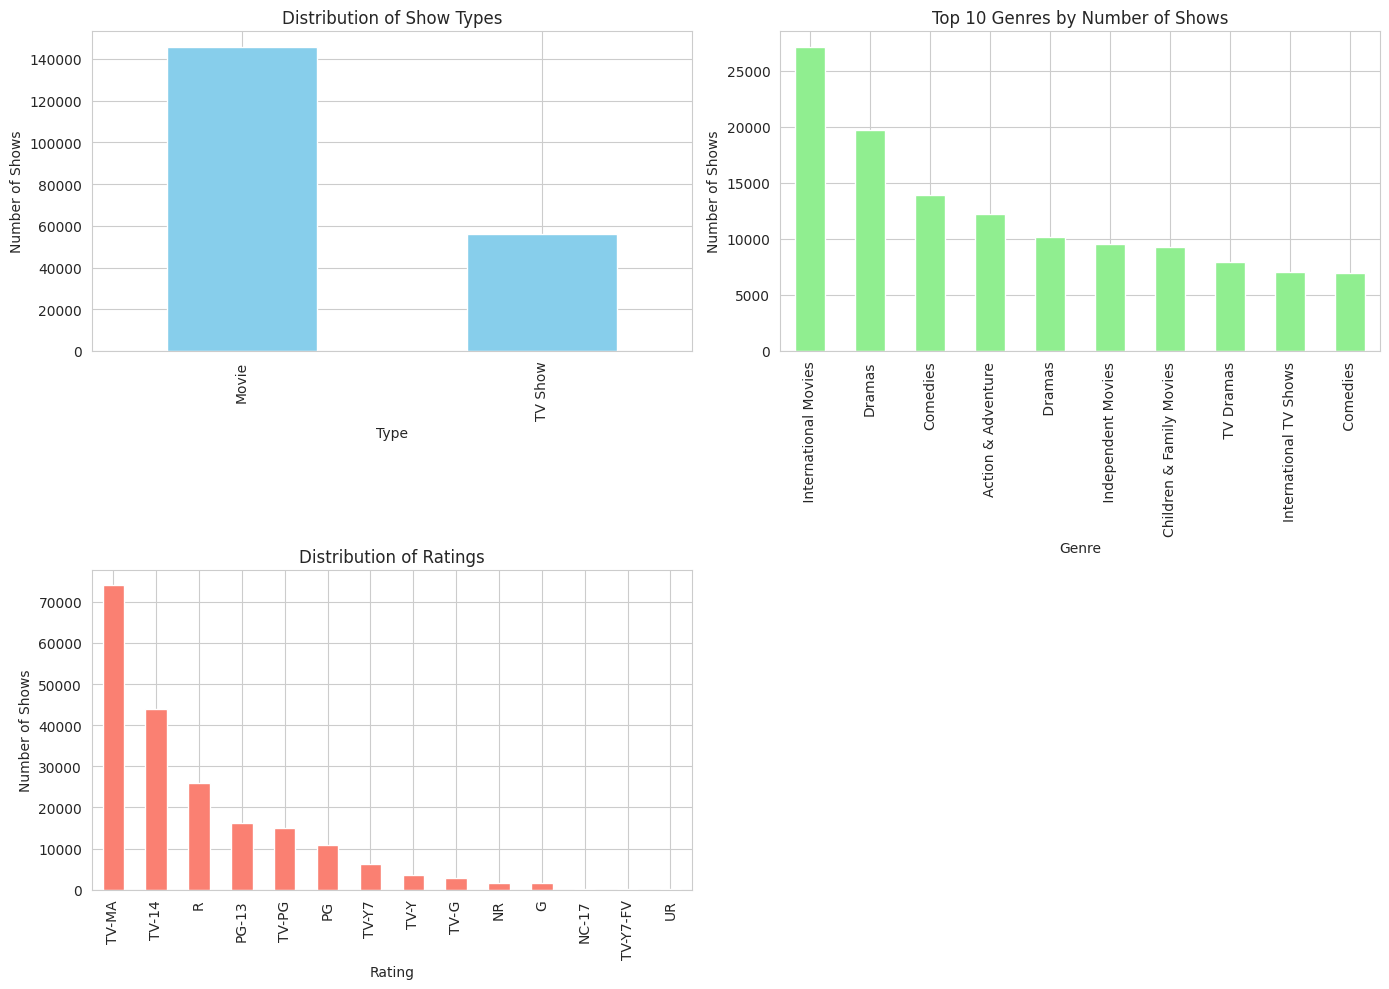

In [157]:
plt.figure(figsize=(14, 10))

# Plot 1: Type of shows
plt.subplot(2, 2, 1)
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Show Types')
plt.xlabel('Type')
plt.ylabel('Number of Shows')

# Plot 2: Genres
plt.subplot(2, 2, 2)
genre_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Genres by Number of Shows')
plt.xlabel('Genre')
plt.ylabel('Number of Shows')

# Plot 3: Ratings
plt.subplot(2, 2, 3)
rating_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')

plt.tight_layout()
plt.show()

# Genres popular accross different countries

In [158]:
country_genre_counts = df.groupby(['country', 'listed_in']).size().reset_index(name='count')
#country_genre_counts = country_genre_counts.pivot(index='country', columns='listed_in', values='count')
country_genre_counts = country_genre_counts.sort_values('count', ascending=False)
country_genre_counts.head(10)

,country,listed_in,count
1547,India,International Movies,6619
2386,United States,Comedies,5261
2383,United States,Children & Family Movies,4779
2391,United States,Dramas,4707
2379,United States,Action & Adventure,4067
1575,India,Dramas,3365
2354,United States,Independent Movies,3316
2346,United States,Comedies,3096
2351,United States,Dramas,2902
2372,United States,TV Dramas,2443


In [159]:
country_genre_counts = df.groupby(['country', 'listed_in']).size().reset_index(name='count')
count = country_genre_counts.groupby(['listed_in','country']).max().sort_values('count', ascending=False)
count

,,count
listed_in,country,
International Movies,India,6619
Comedies,United States,5261
Children & Family Movies,United States,4779
Dramas,United States,4707
Action & Adventure,United States,4067
...,...,...
Docuseries,Denmark,1
Documentaries,Panama,1
Stand-Up Comedy & Talk Shows,Brazil,1


In [160]:
df['month_added'] = df['date_added'].dt.month
#df['season_added'] = (df['month_added']%12 + 3)//3

# Group by 'season_added' and 'listed_in' and count the number of shows in each genre for each season
seasonal_genre_counts = df.groupby(['month_added', 'listed_in']).nunique()['show_id']
seasonal_genre = seasonal_genre_counts.sort_values(ascending=False).reset_index()
seasonal_genre.head(15)



,month_added,listed_in,show_id
0,4,International Movies,254
1,10,International Movies,250
2,3,International Movies,242
3,12,International Movies,240
4,7,International Movies,235
5,6,International Movies,230
6,9,International Movies,227
7,8,International Movies,224
8,5,International Movies,197
9,11,International Movies,181


Number of Tv Shows and Movies added each month

In [161]:
df_rate = df.groupby(["month_added","type"]).agg({'type':'count'})
month = df_rate.rename(columns = {"type":"count"})
month.reset_index(inplace = True)
month.sort_values('count',ascending=False).head(20)


,month_added,type,count
12,7,Movie,15075
0,1,Movie,13947
18,10,Movie,13541
16,9,Movie,13220
22,12,Movie,12768
6,4,Movie,12538
14,8,Movie,11924
10,6,Movie,11616
4,3,Movie,11507
20,11,Movie,11065


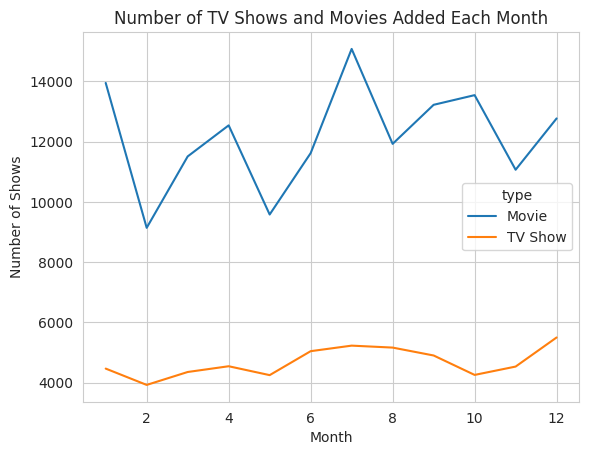

In [162]:
#  graph for above code lineplot showing number of tv shows and movies added each month

import seaborn as sns
import matplotlib.pyplot as plt

# Create a lineplot of the number of TV shows and movies added each month
sns.lineplot(data=month, x="month_added", y="count", hue="type")

# Set the title and axis labels
plt.title("Number of TV Shows and Movies Added Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Shows")

# Show the plot
plt.show()


TV shows and Movies added each week

In [163]:
df['week_added'] = df['date_added'].dt.isocalendar().week
df_rate = df.groupby(["week_added","type"]).agg({'type':'count'})
week = df_rate.rename(columns = {"type":"count"})
week.reset_index(inplace = True)
week.sort_values('count',ascending=False).head(20)

,week_added,type,count
0,1,Movie,8456
86,44,Movie,5563
16,9,Movie,5094
68,35,Movie,5048
50,26,Movie,4931
78,40,Movie,4905
60,31,Movie,4388
52,27,Movie,3808
94,48,Movie,3737
34,18,Movie,3686


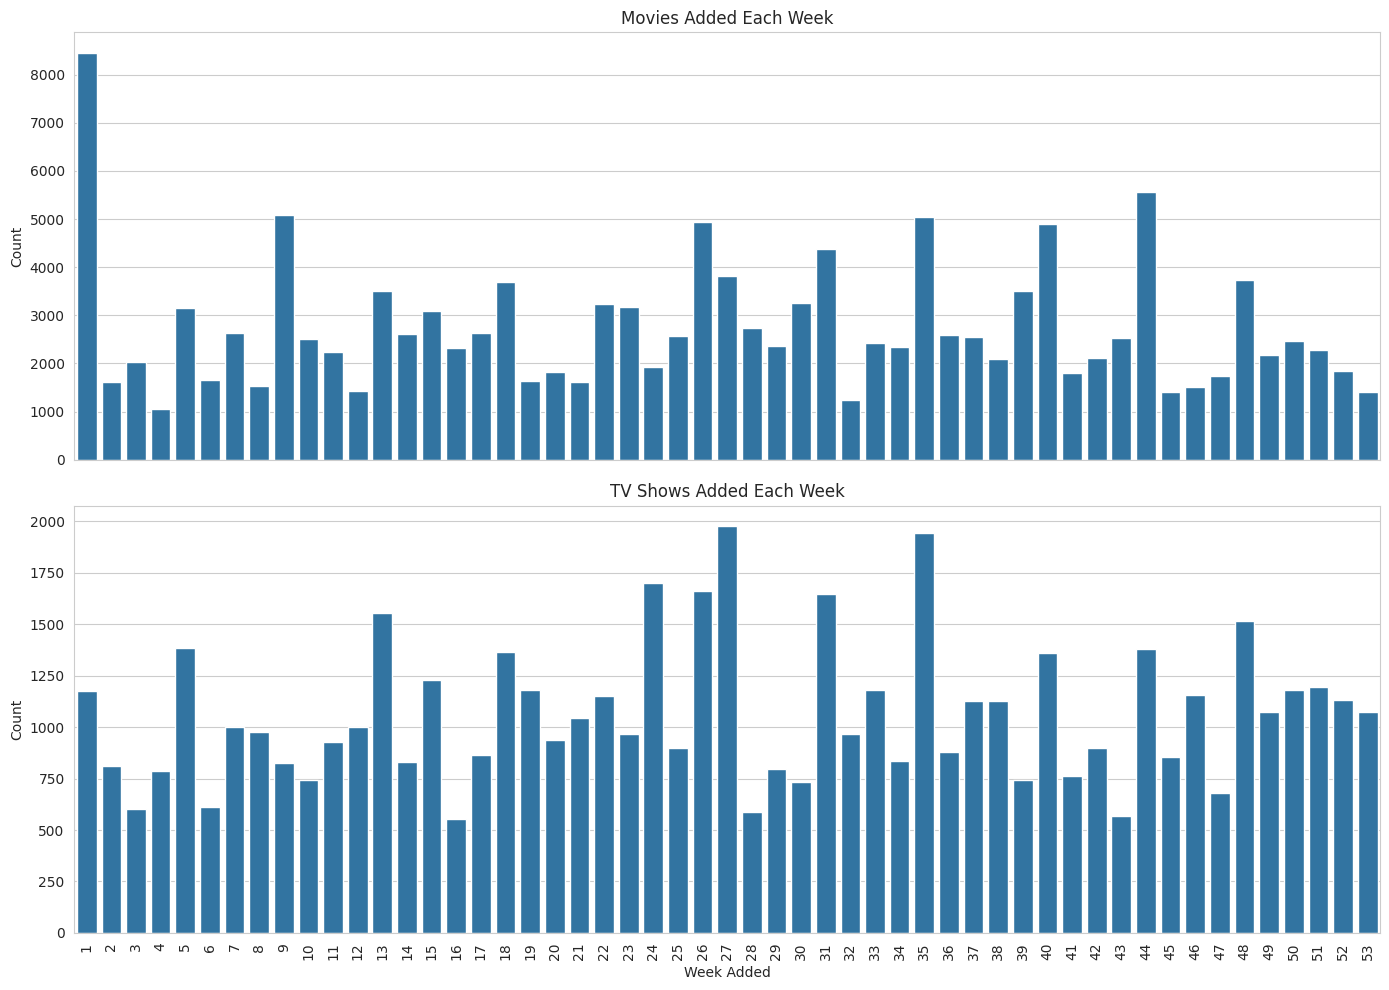

In [164]:
movies = week[week['type'] == 'Movie']
tv_shows = week[week['type'] == 'TV Show']

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Movies
sns.barplot(data=movies.sort_values('week_added'), x='week_added', y='count', ax=axes[0])
axes[0].set_title('Movies Added Each Week')
axes[0].set_xlabel('')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot TV Shows
sns.barplot(data=tv_shows.sort_values('week_added'), x='week_added', y='count', ax=axes[1])
axes[1].set_title('TV Shows Added Each Week')
axes[1].set_xlabel('Week Added')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


Rating and countries

In [165]:
# Group by 'country' and 'rating' and count the number of shows in each combination
rating_counts = df.groupby(['country', 'rating']).size().reset_index(name='count')

# Find the most common rating for each country
most_common_ratings = rating_counts.loc[rating_counts.groupby('country')['count'].idxmax()]

# Display the most common ratings per country
print(most_common_ratings)



          country rating  count
1                  TV-MA     56
2     Afghanistan  TV-MA      2
3         Albania  TV-MA      8
5         Algeria  TV-MA     53
6          Angola  TV-MA     32
..            ...    ...    ...
759       Uruguay  TV-MA    113
761     Venezuela     NR      2
763       Vietnam  TV-14     66
766  West Germany  TV-MA      4
767      Zimbabwe   TV-G     36

[197 rows x 3 columns]


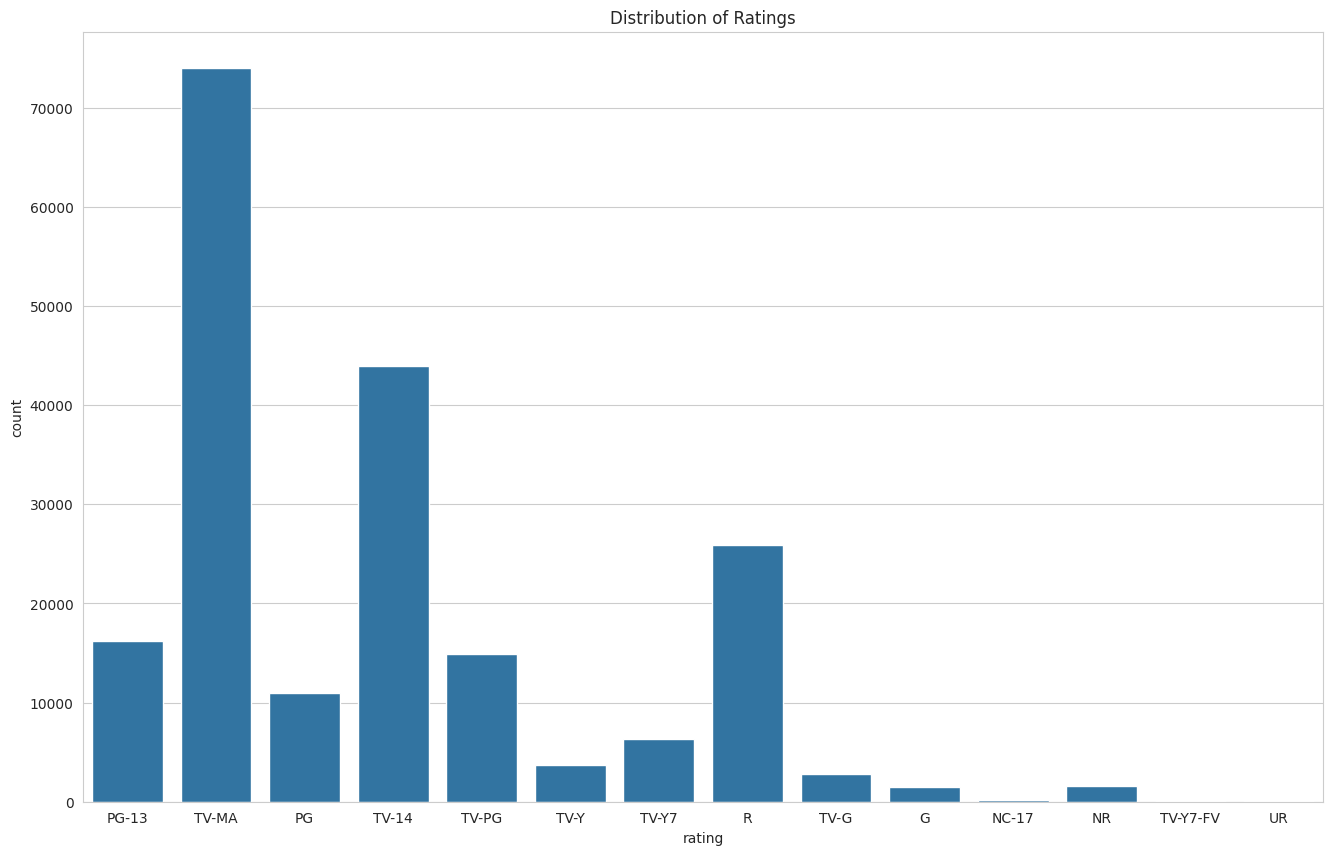

In [166]:
plt.figure(figsize=(16, 10))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

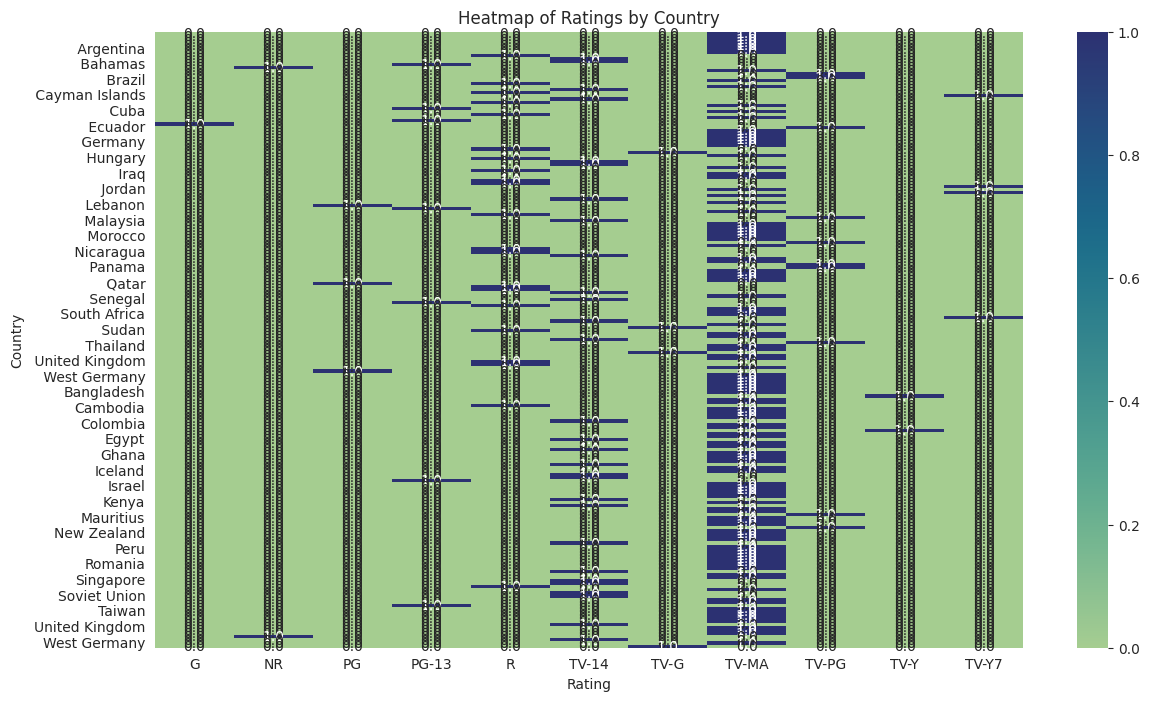

In [167]:
#Group by 'country' and 'rating' and count the number of shows in each combination
rating_counts = df.groupby(['country', 'rating']).size().reset_index(name='count')

# Find the most common rating for each country
most_common_ratings = rating_counts.loc[rating_counts.groupby('country')['count'].idxmax()]

pivot_table = most_common_ratings.pivot_table(index='country', columns='rating', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True,fmt='.1f',cmap="crest")
plt.title('Heatmap of Ratings by Country')
plt.xlabel('Rating')
plt.ylabel('Country')
plt.show()

In [168]:
df_country_rating = pd.DataFrame(df.groupby(['rating','country'])['show_id'].nunique()).reset_index()
df_country_rating.sort_values('show_id',ascending = False).head(10)

,rating,country,show_id
585,TV-MA,United States,1266
387,TV-14,United States,669
351,TV-14,India,563
269,R,United States,547
183,PG-13,United States,370
674,TV-PG,United States,364
540,TV-MA,India,260
757,TV-Y7,United States,227
584,TV-MA,United Kingdom,225
108,PG,United States,217


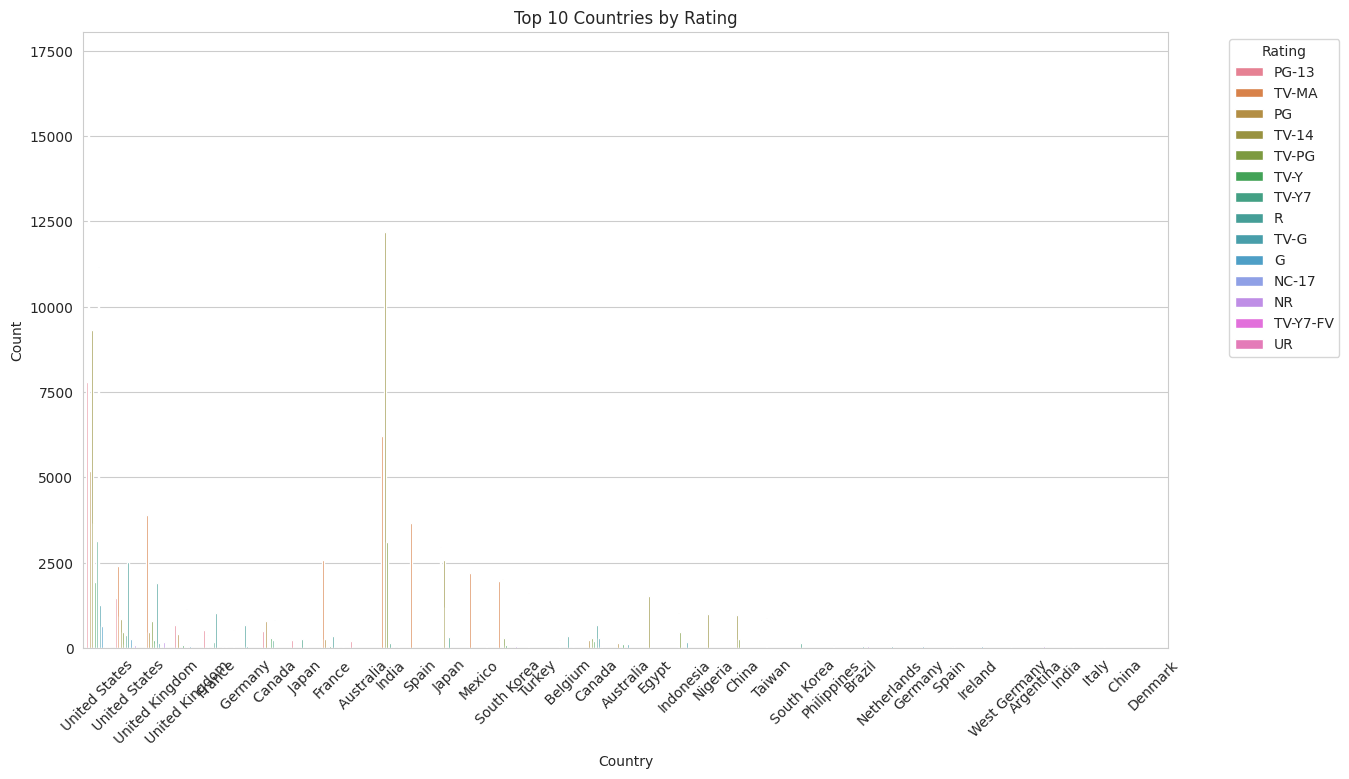

In [169]:
rating_counts = df.groupby(['country', 'rating']).size().reset_index(name='count')

# Function to get top 10 countries for each rating
def get_top_countries_by_rating(df, rating):
    df_rating = df[df['rating'] == rating]
    df_rating_sorted = df_rating.sort_values(by='count', ascending=False).head(10)
    return df_rating_sorted

# Get unique ratings
unique_ratings = df['rating'].unique()

# Get top 10 countries for each rating
top_countries_by_rating = pd.concat([get_top_countries_by_rating(rating_counts, rating) for rating in unique_ratings])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=top_countries_by_rating, x='country', y='count', hue='rating')
plt.title('Top 10 Countries by Rating')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [170]:
df['year'].sort_values()

5957    2008
5957    2008
6611    2008
5957    2008
5957    2008
        ... 
920     2021
920     2021
920     2021
920     2021
0       2021
Name: year, Length: 202065, dtype: int32

Insights

From analysis it can be seen in total Netflix has 8807 total shows inkling Movies and Tv Shows both and out of which there are  
6131-Movies and 676 Tv Shows.
Which shows the 70% percentage of movies and 30% of Tv shows

It is also noted that most common Genre is [International Movies , Dramas , Comedies ,Action,Documentaries].
Out of which International Movies hold the top position

It is also noted that Least common opted Genre is LGBTQ movies and sports movies

There are maximum movies with highest ratings of TV-MA

Maximum number of Movies and Tv Shows production has been noted in United States and India . United States holds the top position in to it

It is Seen Rajiv Chilaka holds the top position as Director and most for family and children entertainment

It is also observed addition of content has been increasing with years and maximum peak time was years 18,19,20,21
And 2020 has observed maximum number of production .The Same scenario has been seen for tv and movies both .
We have also observed we can see notable number of growth in Tv shows after 2018.

It is also observed that best time to launch movie is mostly month like July, Where as For Tv Shows December has been more preferred month.

Insights : It can be seen maximum number of International Movies are seen in India and least number of crime shows in Austria

Insights:  Here we can see number of Movies added is more in 7th month and least in Feb
	     Similarly for Tv Shows also we can notice that it has fluctuating addition pattern and more addition      		is seen in December month and least in Feb .

Insights : The plotting shows the count of movies and TV shows added each week throughout the years
		Identifying peaks in specific weeks helps understand seasonal trends
		For Example high count of movies added in 27th week may be summer release strategy
		Here by comparing two plots we can see that movies has almost similar release patterns where as TV
		Tv Shows spike in particular weeks ,which might indicate preference for worthy release in this period.







Insights on ratings :- Netflix uses various ratings to categories the nature of content and shows based on it
1.	PG-13: Parents Strongly Cautioned. Some material may be inappropriate for children under 13.
2.	TV-MA: Mature Audience Only. Specifically designed to be viewed by adults and may be unsuitable for children under 17.
3.	PG: Parental Guidance Suggested. Some material may not be suitable for children.
4.	TV-14: Parents Strongly Cautioned. Contains some material that many parents would find unsuitable for children under 14 years of age.
5.	TV-PG: Parental Guidance Suggested. Contains material that parents may find unsuitable for younger children.
6.	TV-Y: All Children. Suitable for all children.
7.	TV-Y7: Directed to Older Children. Suitable for children age 7 and above.
8.	R: Restricted. Contains some adult material. Parents are urged to learn more about the film before taking their children to see it.
9.	TV-G: General Audience. Suitable for all ages.
10.	G: General Audiences. All ages admitted.
11.	NC-17: Adults Only. Clearly adult. Children are not admitted.
12.	TV-Y7-FV: Directed to Older Children - Fantasy Violence. Suitable for children age 7 and older, with fantasy violence.
13.	UR: Unrated. The content has not been rated by a recognized rating system.
By identifying common rating in particular region we can understand regional content preferences .For example ,Here we can see TV-MA is most common rating in United states which is mature content .
As here it is seen TV-MA,TV-14 ,TV-PG  and R is mostly preferred ratings


Bussiness Insights



Netflix has majority of content released after 2018 .It is seen content for earlier years is less and hence could not engage senior citizens.IT can try and engage senior citizen by targeting senior citizen audience .

As we saw earlier, Maximum content is of TV-MA , TV-14 or PG and R . Which means 80% of content is either for adult or for children with parental control options.It could target on TV-G and for younger childrens who could be engaged in future .

Most of the Genre in  Netflix is international movies and shows .We can increase audience engagement by more and more preferred genre in particular country .

Only top 10 countries contribute to the 70 % of Netflix content and rest comes for remaining countries hence Netflix could engage more and more countries to increase business and relatable audience



Even We could consider the duration of shows and Movies and work in accordance with it for upcoming shows and seasons .As we saw maximum viewers like watching movies having one seasons or with minimum number of time frame .

Consider what competitors are producing and identify gaps or opportunities where Netflix can differentiate itself from .

Netflix Should Focus more on producing movies along with Tv Shows according to the what we have seen  from  the given data

**Recommendations**

Very limited Genre has been Focused in other countries except United States .Hence every country area should try and add their cultural instinct to it and engage more audience through it .Determine the regional preferences for particular genre and type of content and particular target audience .

Collaborate with local content creator, Producers and distributors to strengthen the market

Try and release more and more original and something new story targeting on different audience groups and keep the waiting period short as now people keep searching new contents more and more.

Netflix Should Focus more on producing movies considering all kinds of ratings and delivering high quality content to audience.`



In [171]:
#done